In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python-headless

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,619 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,224 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packa

In [3]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files


In [8]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

def upload_image():
    """
    Upload an image from the local machine for OCR.
    :return: Path of the uploaded image
    """
    uploaded = files.upload()  # Allows local upload
    img_path = list(uploaded.keys())[0]  # Get the uploaded image file path
    return img_path

def preprocess_image(image_path):
    """
    Preprocess the image for better text extraction.
    :param image_path: Path to the image file
    :return: Preprocessed image for OCR
    """
    # Load the image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    gray = clahe.apply(gray)

    # Sharpen image
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened = cv2.filter2D(gray, -1, kernel)

    # Apply Otsu's Thresholding
    _, otsu_thresh = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Return original, grayscale, and processed images
    return img, gray, otsu_thresh

def extract_text(image, config='--psm 6'):
    """
    Extracts text from an image using Tesseract OCR with additional configuration.
    :param image: Preprocessed image for OCR
    :param config: Tesseract configuration for improved OCR
    :return: Extracted text as a string
    """
    custom_config = r'--oem 3 --psm 6 -l eng'  # Optimal OCR configurations
    text = pytesseract.image_to_string(image, config=custom_config)
    return text


In [21]:
print("Please upload an image for OCR.")
img_path = upload_image()

Please upload an image for OCR.


Saving Abnormal-blood-chemistry-and-serology-findings-from-the-initial-blood-sample.png to Abnormal-blood-chemistry-and-serology-findings-from-the-initial-blood-sample.png


In [22]:
original_img, gray_img, processed_img = preprocess_image(img_path)


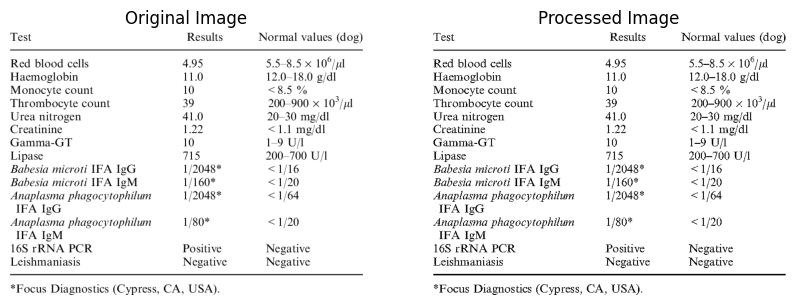

In [23]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(processed_img, cmap='gray')
plt.title("Processed Image")
plt.axis("off")

plt.show()


In [24]:
extracted_text = extract_text(processed_img)

print("Extracted Text:")
print(extracted_text)

Extracted Text:
Test Results Normal values (dog)
Red blood cells 4.95 5.5-8.5 x 10%/pl
Haemoglobin 11.0 12.0-18.0 g/dl
Monocyte count 10 <85%
Thrombocyte count 39 200-900 x 107/yl
Urea nitrogen 41.0 20-30 mg/dl
Creatinine 1.22 <1.1 mg/dl
Gamma-GT 10 1-9 U/l
Lipase TS 200-700 U/l
Babesia microti IFA IgG 1/2048* <1/16
Babesia microti IFA IgM 1/160* < 1/20
Anaplasma phagocytophilum 1/2048* < 1/64

IFA IgG
Anaplasma phagocytophilum 1/80* < 1/20

IFA IgM
168 cRNA PCR Positive Negative
Leishmaniasis Negative Negative
*Focus Diagnostics (Cypress, CA, USA).

